# Vishwanath Gundeli

# Simple Linear Regression with Python Scikit Learn

In this task we have used simple linear regression

IMPORT THE DEPENDENCY LIBRARIES

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

GET THE DATA FROM GIVEN URL

In [168]:
data=pd.read_csv('http://bit.ly/w-data')
print(data.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


PLOT THE DATA

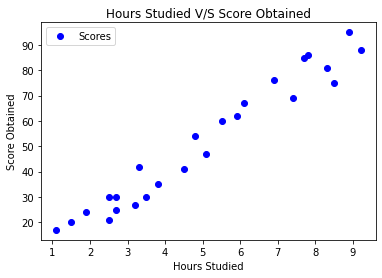

In [169]:
data.plot(x='Hours', y='Scores', style='bo')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.title('Hours Studied V/S Score Obtained')

plt.show()

In [171]:
pearson_coef, p_value = stats.pearsonr(data.Hours, data.Scores)
print(pearson_coef)

0.9761906560220884


AS WE CAN SEE FROM ABOVE PLOT, THE GRAPH KEEP ON RISING LINEARLY, ALSO THE PEARSON_COEFFICIENT IS GREATER THAN 0.8, WHICH MEANS THAT SIMPLE LINEAR REGRESSION IS WELL SUITED FOR THE GIVEN TASK 

# Preparing the data

Creating attributes and Labels from the dataset

In [172]:
x=data.iloc[:, :-1].values
y=data.iloc[:, -1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the data

We will use train_test_split from sklearn to split our data into training and test datasets.

In [173]:
from sklearn.model_selection import train_test_split

Now that we have imported train_test_split, now we will split the dataset into training_dataset and test_dataset, here size of the test_datset is 27% of the given dataset and the rest is the training_dataset.

In [174]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.27, random_state=0)

We will import the builtin LinearRegression model from sklearn

In [175]:
from sklearn.linear_model import LinearRegression 

In [176]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

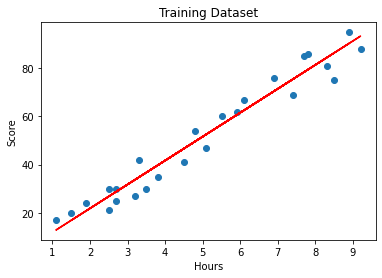

In [177]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Training Dataset')
plt.show()

In [178]:
print(x_test)
print(y_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
[20 27 69 30 62 35 24]


# Testing our prediction

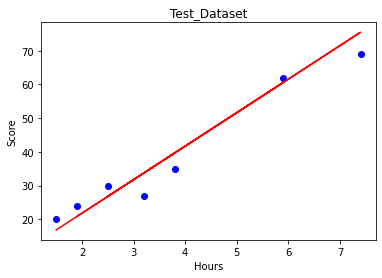

In [179]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, y_pred, color = 'red')
plt.ylabel('Score')
plt.xlabel('Hours')
plt.title('Test_Dataset')
plt.show()

Let us check the prediction of the trained model compared with actual data of test_dataset.

In [180]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Let us predict output of a custom input.

In [181]:
hours = [[9.25]]
own_predict = regressor.predict(hours)
print('Number of hours: {}'.format(hours[0][0]))
#print(own_predict)
print('Predicted Score: {}'.format(own_predict[0]))

Number of hours: 9.25
Predicted Score: 93.89272889341655


# Checking Error

Finally we check for the mean error between the actual data and the predicted data form the test_dataset.

In [182]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
